# Static Maps

In [2]:
import geopandas as gpd 
from pyproj import CRS

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import contextily as ctx
import plotly.express as px

In [4]:
grid_fp = "data/ch8/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/ch8/roads.shp"
metro_fp = "data/ch8/metro.shp"

grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

print(roads.crs, metro.crs, grid.crs)

EPSG:2392 EPSG:2392 EPSG:3067


>Check the name of the crs

In [5]:
print(f"Roads crs: {CRS(roads.crs).name}")
print(f"Metro crs: {CRS(metro.crs).name}")
print(f"Grid crs: {CRS(grid.crs).name}")

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs: ETRS89 / TM35FIN(E,N)


In [6]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)
roads.crs == metro.crs == grid.crs

True

In [ ]:
fig = px.choropleth_map()

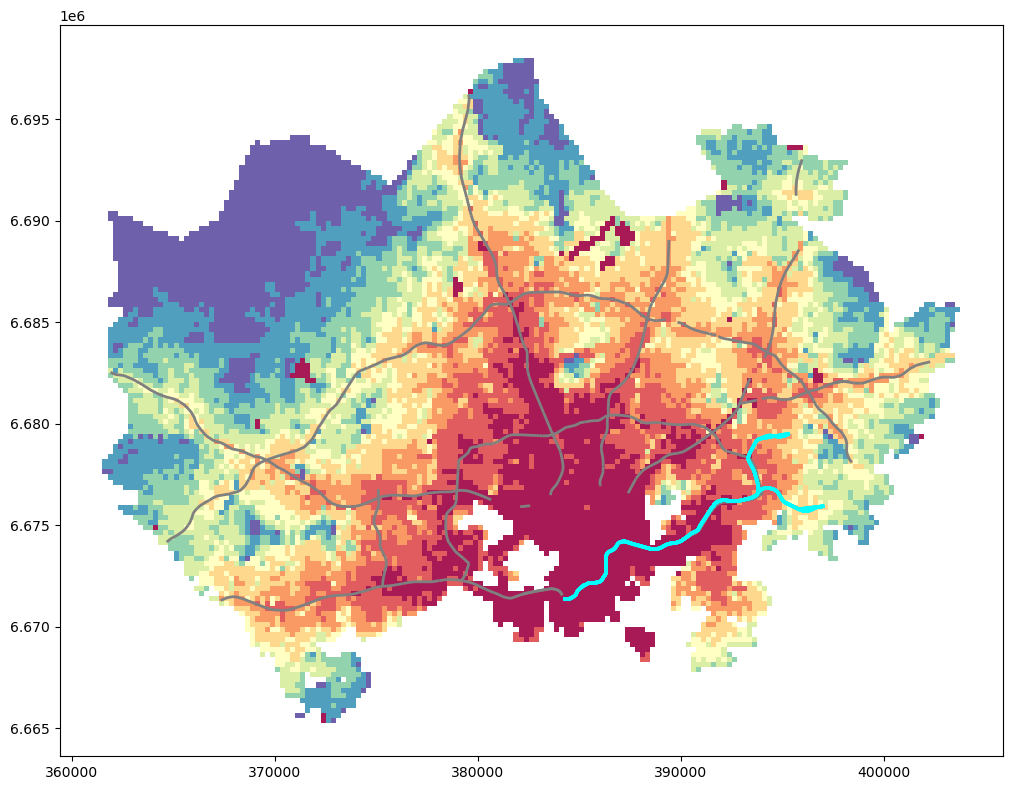

In [7]:
ax = grid.plot(column="car_r_t", 
               scheme='quantiles', 
               linewidth=0.03,
               k=9, cmap="Spectral", 
               alpha=0.9, 
               figsize=(12,8))
roads.plot(ax=ax, color="grey", linewidth=2)
metro.plot(ax=ax, color="cyan", linewidth=2.5)

plt.tight_layout()
plt.savefig("images/static_map.png", dpi=300)
plt.show()

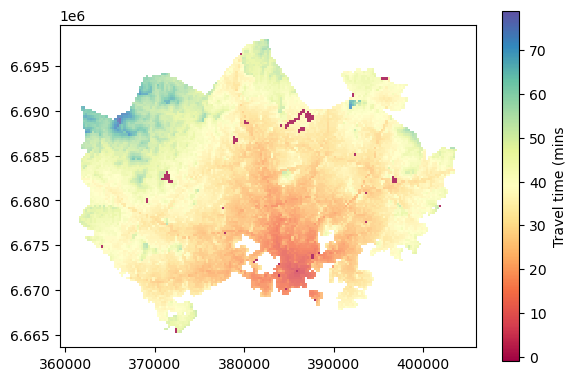

In [25]:
fix, ax = plt.subplots(figsize=(6,4))

grid.plot(
    ax=ax, 
    column="car_r_t", 
    cmap="Spectral", 
    legend=True,
    legend_kwds={"label": "Travel time (mins"}, 
    linewidth=0.5, 
    alpha=0.8
)

plt.tight_layout();

# Map legend for classification

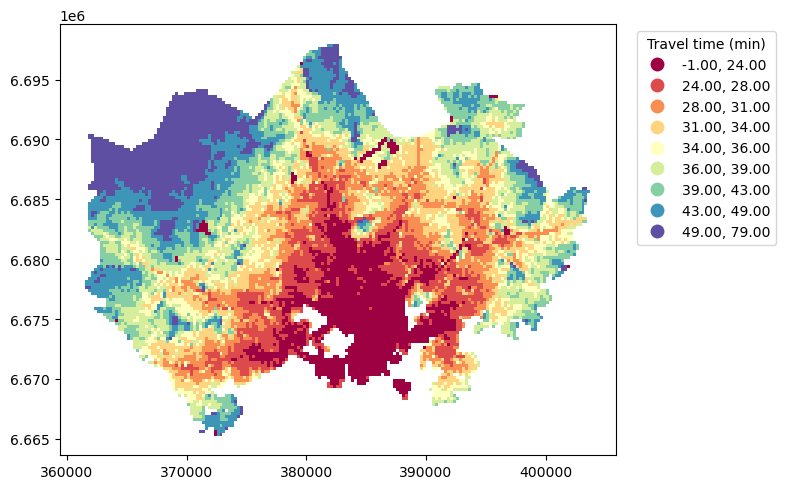

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(
    ax=ax,
    column="car_r_t",
    linewidth=0.03,
    cmap="Spectral",
    scheme="quantiles",
    k=9,
    legend=True,
)

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.3, 1))
ax.get_legend().set_title("Travel time (min)")

# Remove the empty white-space around the axes
plt.tight_layout()

# Adding basemap

remember to match crs

In [29]:
print(grid.crs)

EPSG:3067


>convert to Web Mercator EPSG:3857

In [30]:
data = grid.to_crs(3857)

In [31]:
print(data.crs)

EPSG:3857


In [32]:
print(data.head(2))

   car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   

                                            geometry  
0  POLYGON ((2767221.646 8489079.101, 2766716.966...  
1  POLYGON ((2767726.329 8489095.521, 2767221.646...  


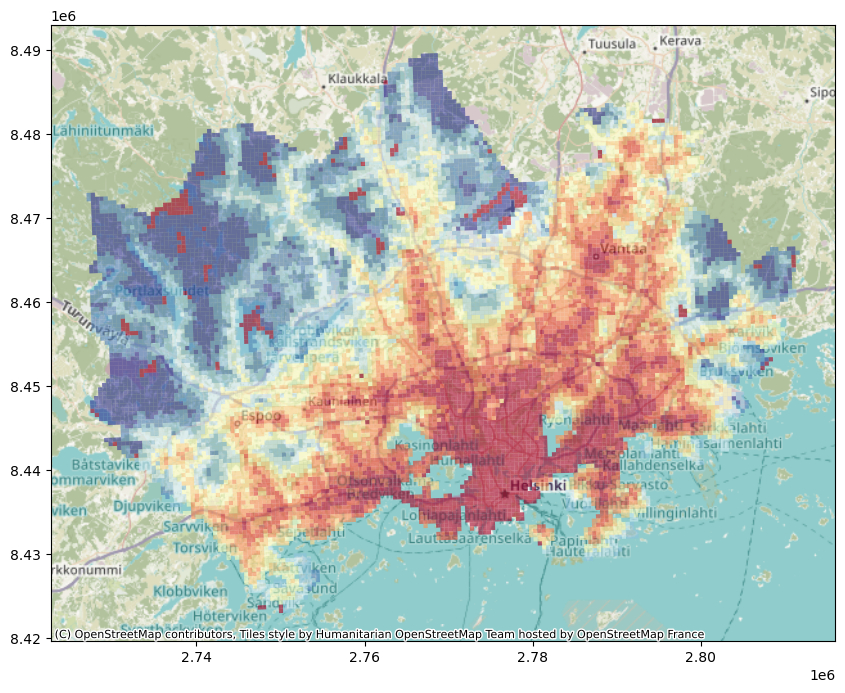

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

data.plot(
    ax=ax,
    column="pt_r_t", 
    cmap="RdYlBu", 
    linewidth=0.3, 
    scheme="quantiles", 
    k=9, 
    alpha=0.6,
)
ctx.add_basemap(ax);

# Data source providers

In [34]:
dir(ctx.providers)

['AzureMaps',
 'BaseMapDE',
 'BasemapAT',
 'CartoDB',
 'CyclOSM',
 'Esri',
 'FreeMapSK',
 'Gaode',
 'GeoportailFrance',
 'HERE',
 'HEREv3',
 'HikeBike',
 'Jawg',
 'JusticeMap',
 'MapBox',
 'MapTiler',
 'MapTilesAPI',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OPNVKarte',
 'OneMapSG',
 'OpenAIP',
 'OpenFireMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenSnowMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'OrdnanceSurvey',
 'SafeCast',
 'Stadia',
 'Strava',
 'SwissFederalGeoportal',
 'Thunderforest',
 'TomTom',
 'TopPlusOpen',
 'USGS',
 'WaymarkedTrails',
 'nlmaps']

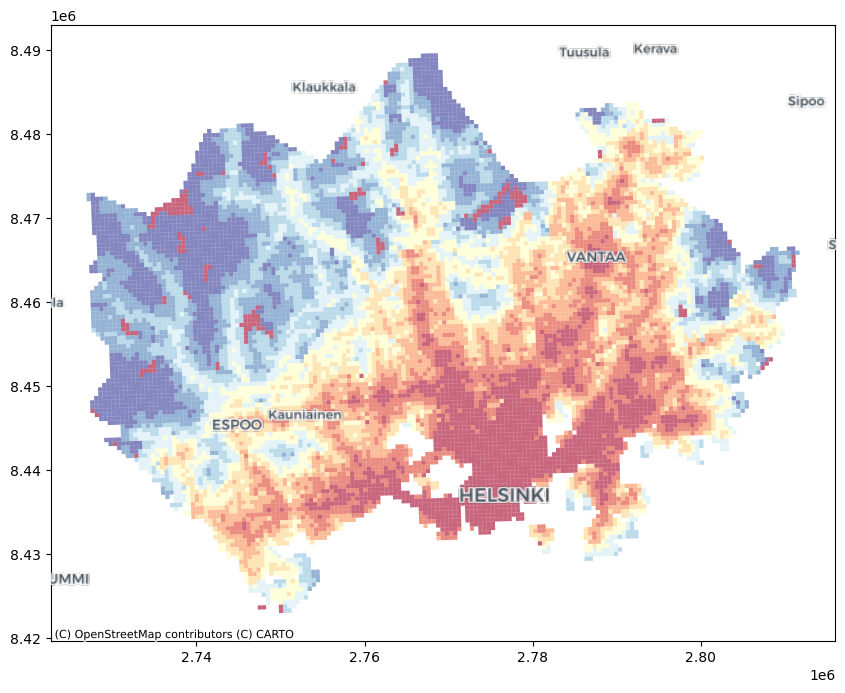

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

data.plot(
    ax=ax,
    column="pt_r_t", 
    cmap="RdYlBu", 
    linewidth=0.3, 
    scheme="quantiles", 
    k=9, 
    alpha=0.6,
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronOnlyLabels);

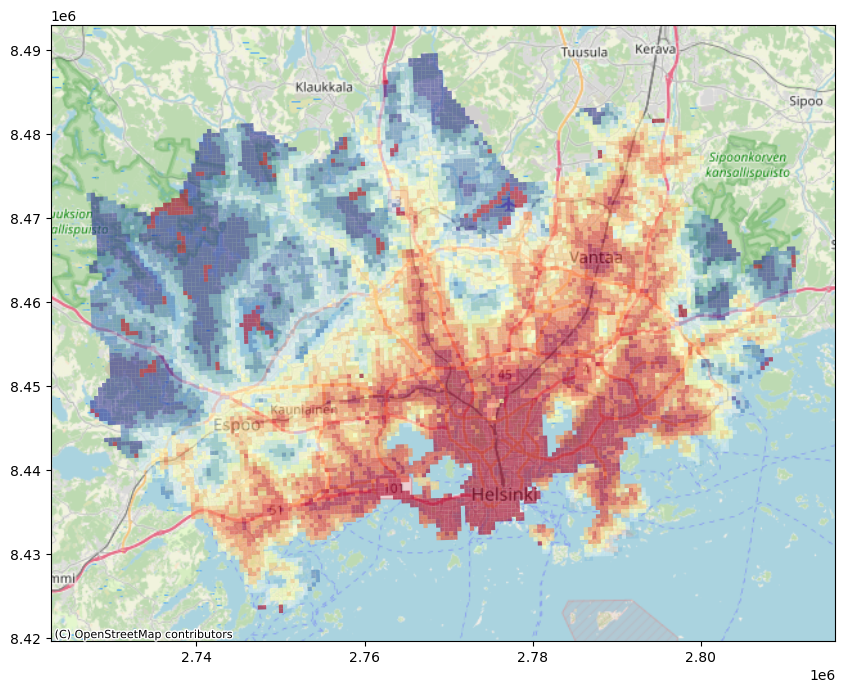

In [39]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
data.plot(
    ax=ax,
    column="pt_r_t",
    cmap="RdYlBu",
    linewidth=0,
    scheme="quantiles",
    k=9,
    alpha=0.6,
)

# Add basemap with basic OpenStreetMap visualization
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

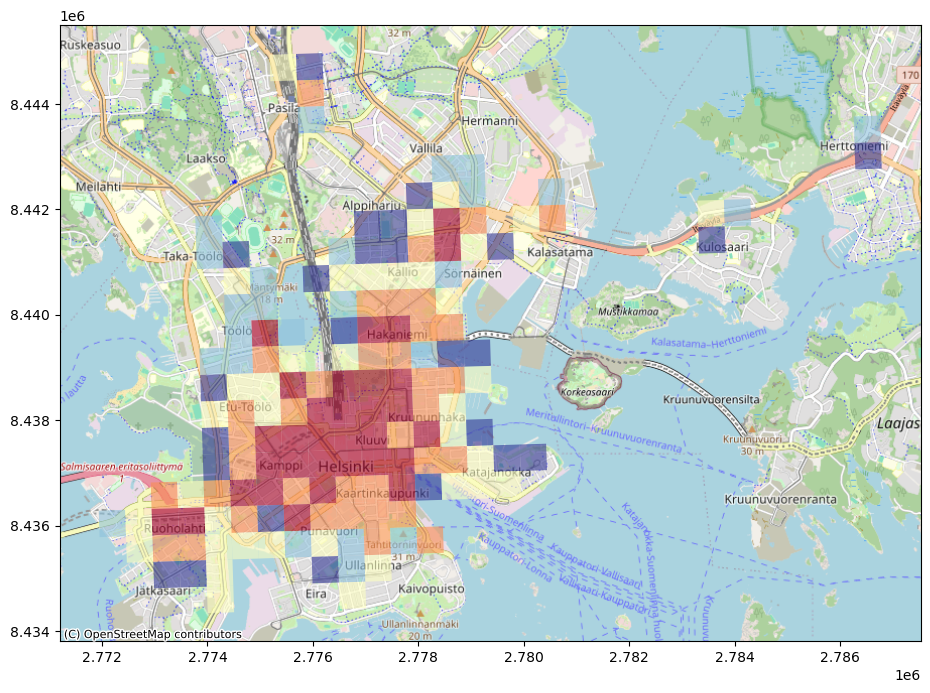

In [53]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Subset the data to seel only grid squares near the destination
subset = data.loc[(data["pt_r_t"] >= 0) & (data["pt_r_t"] <= 15)]

# Plot the data from subset
subset.plot(
    ax=ax,
    column="pt_r_t",
    cmap="RdYlBu",
    linewidth=0,
    scheme="quantiles",
    k=5,
    alpha=0.6,
)

# Add basemap with `OSM_A` style
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik);

>Change zoom level 
>- defaults to auto
>- can set from 1-19, higher being more detailed
>- can lose too much detail

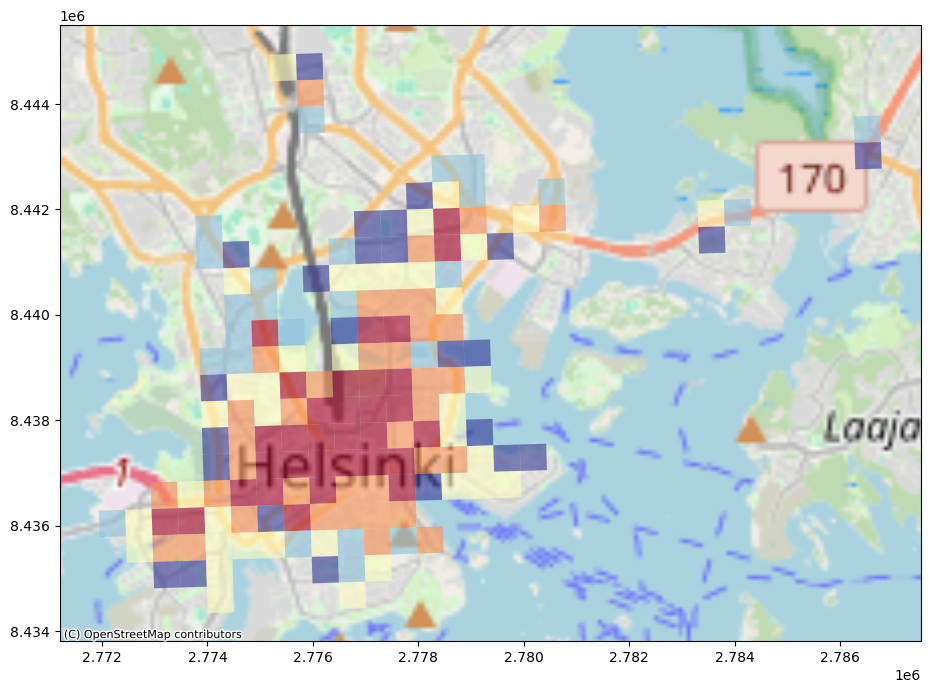

In [54]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data from subset
subset.plot(
    ax=ax,
    column="pt_r_t",
    cmap="RdYlBu",
    linewidth=0,
    scheme="quantiles",
    k=5,
    alpha=0.6,
)

# Add basemap with `OSM_A` style using zoom level of 11
ctx.add_basemap(ax, zoom=11, source=ctx.providers.OpenStreetMap.Mapnik)

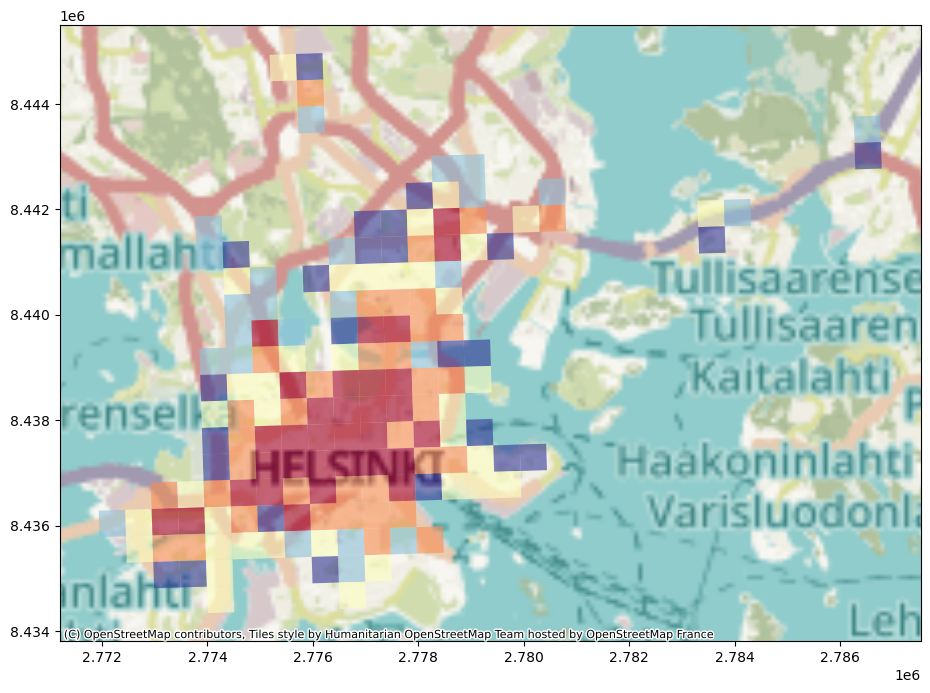

In [55]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data from subset
subset.plot(
    ax=ax,
    column="pt_r_t",
    cmap="RdYlBu",
    linewidth=0,
    scheme="quantiles",
    k=5,
    alpha=0.6,
)

# Add basemap with `OSM_A` style using zoom level of 11
ctx.add_basemap(ax, zoom=11, source=ctx.providers.OpenStreetMap.HOT);

>Clipping

In [56]:
credits = "Travel time data by Tenkanen & Toivonen (2020), Map Data © OpenStreetMap contributors"

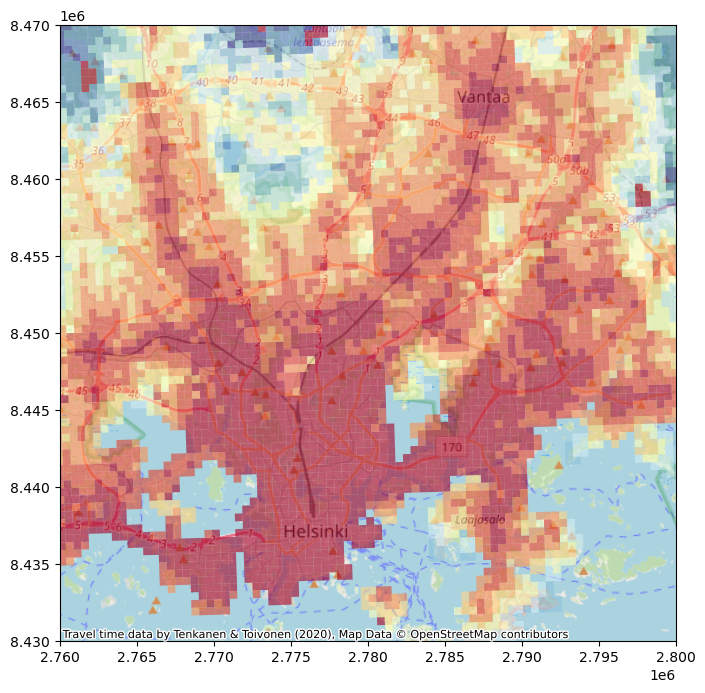

In [58]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
data.plot(
    ax=ax,
    column="pt_r_t",
    cmap="RdYlBu",
    linewidth=0,
    scheme="quantiles",
    k=9,
    alpha=0.6,
)

# Add basemap with `OSM_A` style using zoom level of 11
# Modify the attribution
ctx.add_basemap(
    ax, zoom=11, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik
)

# Crop the figure
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8470000);

# CartoDB

[Reference](https://github.com/CartoDB/basemap-styles#1-web-raster-basemaps)

'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png' where:

    {s}: one of the available subdomains, either [a,b,c,d]

    {z} : Zoom level. We support from 0 to 20 zoom levels in OSM tiling system.

    {x},{y}: Tile coordinates in OSM tiling system

    {scale}: OPTIONAL “@2x” for double resolution tiles

    {style}: Map style, possible value is one of:
        light_all,
        dark_all,
        light_nolabels,
        light_only_labels,
        dark_nolabels,
        dark_only_labels,
        rastertiles/voyager,
        rastertiles/voyager_nolabels,
        rastertiles/voyager_only_labels,
        rastertiles/voyager_labels_under

In [59]:
cdb_url = "https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png" % style

In [68]:
def cdb_plot(data, style):
    url = "https://a.basemaps.cartocdn.com/" + style + "/{z}/{x}/{y}.png"
    fig, ax = plt.subplots(figsize=(12,8))

    data.plot(
        ax=ax,
        column="pt_r_t",
        cmap="RdYlBu",
        linewidth=0,
        scheme="quantiles",
        k=5,
        alpha=0.6,
    )
    ctx.add_basemap(ax, zoom=14, attribution="", source=url)
    ax.set_xlim(2770000, 2785000)
    ax.set_ylim(8435000, 8442500)

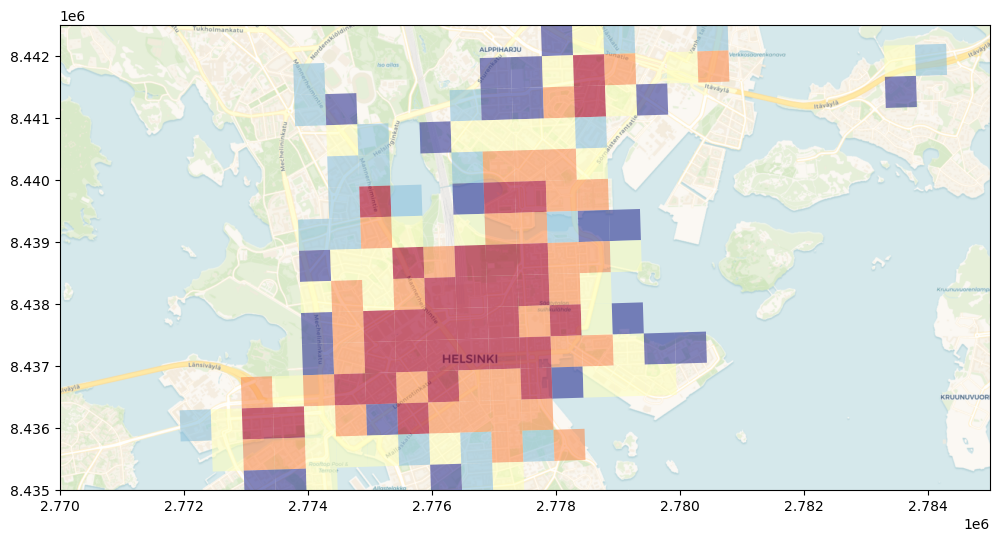

In [70]:
style = "rastertiles/voyager"
cdb_plot(subset, style)

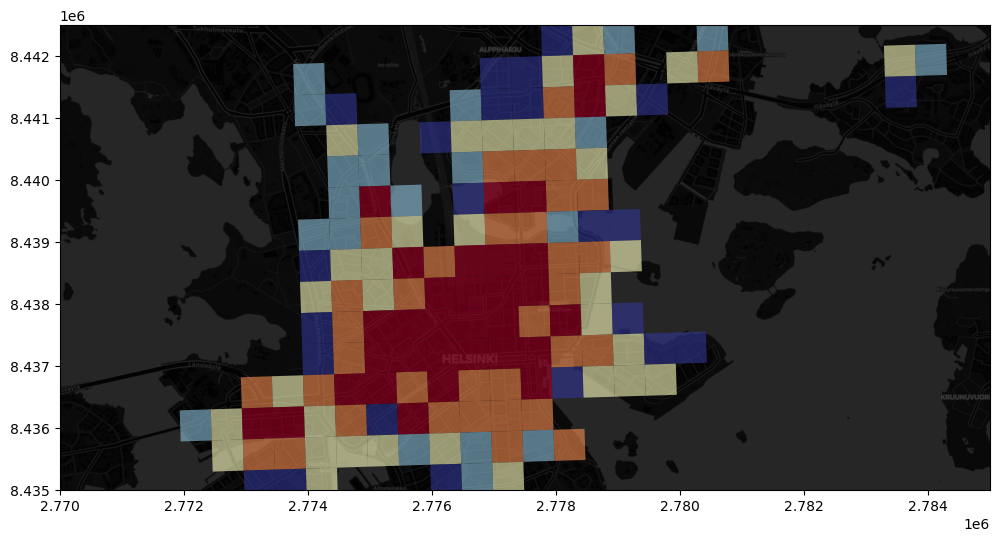

In [71]:
style = "dark_all"
cdb_plot(subset, style)

# Data reclassification

>Classification based on travel time
>
>Find apartments less than 30 minutes from work and less than
>1000 € per month

    Use classification schemes from the PySAL mapclassify library to classify travel times into multiple classes.

    Create a custom classifier to classify travel times and distances in order to find out good locations to buy an apartment with these conditions:

        good public transport accessibility to city center

        bit further away from city center where the prices are presumably lower


>Clasification Schemes

    Box_Plot
    Equal_Interval
    Fisher_Jenks
    Fisher_Jenks_Sampled
    HeadTail_Breaks
    Jenks_Caspall
    Jenks_Caspall_Forced
    Jenks_Caspall_Sampled
    Max_P_Classifier
    Maximum_Breaks
    Natural_Breaks
    Quantiles
    Percentiles
    Std_Mean
    User_Defined

In [72]:
import geopandas as gpd 
acc = data.copy()
print(acc.head())

   car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   
2    30133       50    31872       56  5785642   32940     121      146   
3    32690       54    34429       60  5785643   33233     125      150   
4    31872       42    31834       48  5787544   32127     109      126   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   
2   32940     113      133  5975375   29626     423   
3   33233     117      144  5975375   29919     427   
4   32127     101      121  5975375   31674     452   

                                            geometry  
0  POLYGON ((2767221.646 8489079.101, 2766716.966...  
1  POLYGON ((2767726.329 8489095.521, 2767221.646...  
2  POLYGON ((2768231.014 8489111.905, 2767726.329... 

`pt_r_tt` is time to the city center 
`walk_d` is distance by roads to the center
`NoData` is -1

In [73]:
acc = acc.loc[acc["pt_r_tt"] >= 0]

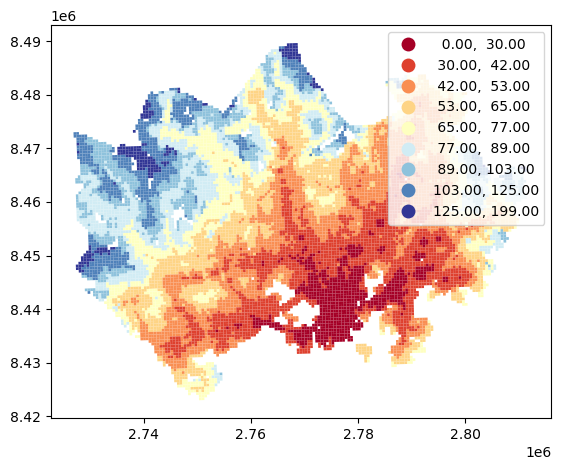

In [82]:
import matplotlib.pyplot as plt

def accPlot(data,column):
    data.plot(
        column=column, 
        scheme="Natural_Breaks",
        k=9, 
        cmap="RdYlBu", 
        linewidth=0, 
        legend=True
    )
    plt.tight_layout()

accPlot(acc, "pt_r_tt")

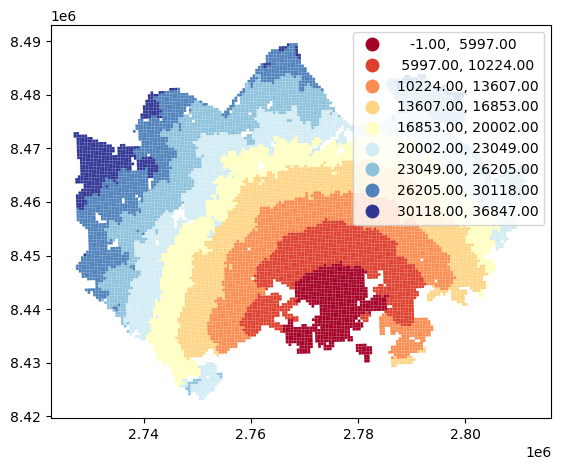

In [83]:
accPlot(acc, "walk_d")

# Applying Classifiers

In [84]:
import mapclassify

In [85]:
mapclassify.NaturalBreaks(y=acc["pt_r_tt"], k=9)

NaturalBreaks

    Interval       Count
------------------------
[  0.00,  30.00] |   837
( 30.00,  42.00] |  2088
( 42.00,  53.00] |  2545
( 53.00,  63.00] |  1932
( 63.00,  74.00] |  1581
( 74.00,  87.00] |  1737
( 87.00, 102.00] |  1209
(102.00, 125.00] |   865
(125.00, 199.00] |   226

In [87]:
mapclassify.Quantiles(y=acc["pt_r_tt"])

Quantiles

    Interval       Count
------------------------
[  0.00,  41.00] |  2674
( 41.00,  52.00] |  2576
( 52.00,  66.00] |  2623
( 66.00,  85.00] |  2616
( 85.00, 199.00] |  2531

In [88]:
classifier = mapclassify.NaturalBreaks(y=acc["pt_r_tt"], k=9)
type(classifier)

mapclassify.classifiers.NaturalBreaks

In [89]:
classifier.bins

array([ 31.,  43.,  54.,  66.,  77.,  89., 103., 125., 199.])

>The classifier must be initialized with `make()`

In [90]:
classifier = mapclassify.NaturalBreaks.make(k=9)

In [91]:
type(classifier)

function

In [92]:
classifications = acc[["pt_r_tt"]].apply(classifier)

print(classifications.head())

   pt_r_tt
0        8
1        8
2        8
3        8
4        7


In [93]:
classifications.shape

(13020, 1)

In [94]:
type(classifications)

pandas.core.frame.DataFrame

In [95]:
acc["nb_pt_r_tt"] = acc[["pt_r_tt"]].apply(classifier)
print(acc[["pt_r_tt", "nb_pt_r_tt"]].head())

   pt_r_tt  nb_pt_r_tt
0      139           8
1      133           8
2      133           8
3      144           8
4      121           7


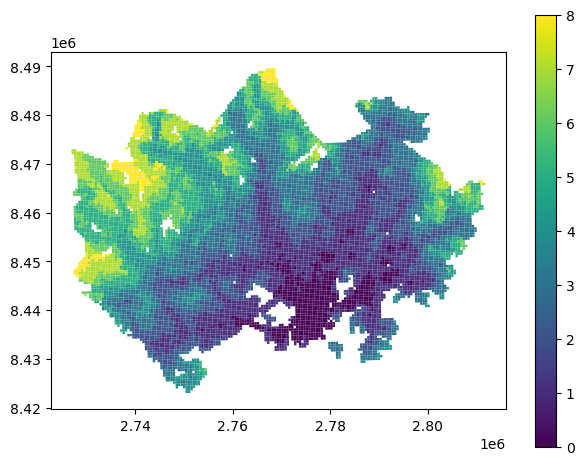

In [97]:
acc.plot(column="nb_pt_r_tt", linewidth=0, legend=True)
plt.tight_layout();